# News, Google Trends and Stock Market

Let's fetch teh google trends data using publicly available Google API

In [1]:
pip install pytrends 

You should consider upgrading via the '/Users/AkshayPatil/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pytrends.request import TrendReq
import time
startTime = time.time()
pytrends = TrendReq(hl = 'en-US', tz = 360)

In [4]:
colnames = ["keywords"]
df = pd.read_csv("keywords_list2.csv", names = colnames)
keywords = df["keywords"].values.tolist()                      #convert dataframe to list so it is easy 
                                                          #to pass in for loop
keywords.remove("Keywords")


dataset = []

for i in range(0,len(keywords)):
    keyword = [keywords[i]]
    pytrends.build_payload(
                kw_list = keyword,
                cat = 7,
                timeframe = '2011-01-01 2016-1-31',
                geo = 'US',
                gprop = '')
    data = pytrends.interest_over_time()
    
    if not data.empty:
        data = data.drop(labels = ['isPartial'], axis = 'columns')
        dataset.append(data)

result = pd.concat(dataset, axis = 1)
result.to_csv('GoogleTrends_dataset2', encoding = 'utf_8_sig')

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv('GoogleTrends_dataset2')

In [8]:
df.shape

(266, 30)

In [9]:
df

,date,CSCO,AAPL,AXP,UNH,WMT,TRV,JPM,IBM,MMM,...,INTC,AMGN,VZ,CAT,KO,CRM,BA,HON,WBA,MSFT
0,2011-01-02,35,10,0,11,20,0,52,53,68,...,31,16,100,44,25,27,34,26,0,57
1,2011-01-09,46,22,0,32,31,51,51,42,0,...,64,16,45,62,25,40,53,26,0,24
2,2011-01-16,46,48,24,11,12,0,14,73,16,...,20,0,15,38,0,26,62,0,13,39
3,2011-01-23,34,16,23,31,23,51,28,48,49,...,15,47,15,52,24,13,57,0,12,62
4,2011-01-30,43,17,0,20,7,0,47,76,0,...,24,59,77,47,35,12,54,24,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2016-01-03,18,45,25,22,22,0,38,33,69,...,24,25,59,57,19,55,50,40,26,41
262,2016-01-10,41,45,0,43,41,0,37,34,75,...,41,56,19,70,0,20,58,13,26,32
263,2016-01-17,24,41,49,54,20,0,37,51,43,...,16,8,39,67,32,27,60,39,26,41
264,2016-01-24,24,61,24,60,34,26,37,45,51,...,17,41,31,71,25,34,79,26,26,57


In [10]:
df = df.set_index('date')

In [11]:
df1 = df.copy(deep = True)

In [12]:
df1.head()

,CSCO,AAPL,AXP,UNH,WMT,TRV,JPM,IBM,MMM,PG,...,INTC,AMGN,VZ,CAT,KO,CRM,BA,HON,WBA,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2011-01-02,35,10,0,11,20,0,52,53,68,37,...,31,16,100,44,25,27,34,26,0,57
2011-01-09,46,22,0,32,31,51,51,42,0,18,...,64,16,45,62,25,40,53,26,0,24
2011-01-16,46,48,24,11,12,0,14,73,16,36,...,20,0,15,38,0,26,62,0,13,39
2011-01-23,34,16,23,31,23,51,28,48,49,18,...,15,47,15,52,24,13,57,0,12,62
2011-01-30,43,17,0,20,7,0,47,76,0,17,...,24,59,77,47,35,12,54,24,0,44


In [13]:
df2 = pd.read_csv('DJI.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,11577.429688,11742.679688,11577.349609,11674.759766,11674.759766,933840000
1,2011-01-10,11672.339844,11794.150391,11573.870117,11787.379883,11787.379883,815170000
2,2011-01-17,11783.820313,11905.480469,11744.769531,11871.839844,11871.839844,799920000
3,2011-01-24,11873.429688,12020.519531,11803.040039,11823.700195,11823.700195,926210000
4,2011-01-31,11824.389648,12092.419922,11817.879883,12092.150391,12092.150391,796400000


In [14]:
df2['direction'] = np.log(df2['Adj Close']/df2['Adj Close'].shift(1))

In [15]:
df2['direction'] = np.where(df2['direction'] < 0, -1, 1)

In [16]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume,direction
0,2011-01-03,11577.429688,11742.679688,11577.349609,11674.759766,11674.759766,933840000,1
1,2011-01-10,11672.339844,11794.150391,11573.870117,11787.379883,11787.379883,815170000,1
2,2011-01-17,11783.820313,11905.480469,11744.769531,11871.839844,11871.839844,799920000,1
3,2011-01-24,11873.429688,12020.519531,11803.040039,11823.700195,11823.700195,926210000,-1
4,2011-01-31,11824.389648,12092.419922,11817.879883,12092.150391,12092.150391,796400000,1
...,...,...,...,...,...,...,...,...
261,2016-01-04,17405.480469,17405.480469,16314.570313,16346.450195,16346.450195,692150000,-1
262,2016-01-11,16358.709961,16593.509766,15842.110352,15988.080078,15988.080078,796840000,-1
263,2016-01-18,16009.450195,16171.959961,15450.559570,16093.509766,16093.509766,627220000,1
264,2016-01-25,16086.459961,16466.300781,15863.719727,16466.300781,16466.300781,727870000,1


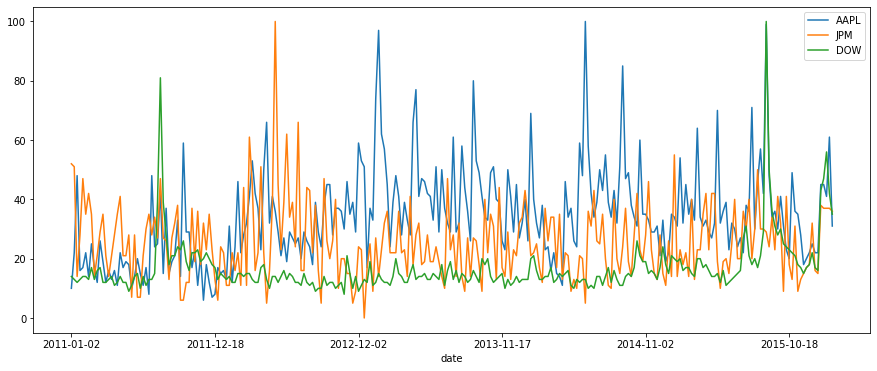

In [17]:
fig = plt.gcf()
fig.set_size_inches(15, 6)

ax = plt.gca()

df.plot(kind='line',y='AAPL',ax=ax)

df.plot(kind='line',y='JPM',ax=ax)

df.plot(kind='line',y='DOW',ax=ax)
plt.show()

In [18]:
df1.head()

,CSCO,AAPL,AXP,UNH,WMT,TRV,JPM,IBM,MMM,PG,...,INTC,AMGN,VZ,CAT,KO,CRM,BA,HON,WBA,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2011-01-02,35,10,0,11,20,0,52,53,68,37,...,31,16,100,44,25,27,34,26,0,57
2011-01-09,46,22,0,32,31,51,51,42,0,18,...,64,16,45,62,25,40,53,26,0,24
2011-01-16,46,48,24,11,12,0,14,73,16,36,...,20,0,15,38,0,26,62,0,13,39
2011-01-23,34,16,23,31,23,51,28,48,49,18,...,15,47,15,52,24,13,57,0,12,62
2011-01-30,43,17,0,20,7,0,47,76,0,17,...,24,59,77,47,35,12,54,24,0,44


In [13]:
# from sklearn import preprocessing
# df1= preprocessing.scale(df1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_X = scaler.fit_transform(df1)


In [20]:
train_data_X

array([[0.35      , 0.04255319, 0.        , ..., 0.26      , 0.        ,
        0.57      ],
       [0.46      , 0.17021277, 0.        , ..., 0.26      , 0.        ,
        0.24      ],
       [0.46      , 0.44680851, 0.24      , ..., 0.        , 0.13      ,
        0.39      ],
       ...,
       [0.24      , 0.37234043, 0.49      , ..., 0.39      , 0.26      ,
        0.41      ],
       [0.24      , 0.58510638, 0.24      , ..., 0.26      , 0.26      ,
        0.57      ],
       [0.23      , 0.26595745, 0.35      , ..., 0.26      , 0.13      ,
        0.47      ]])

In [21]:
train_data_X.shape

(266, 29)

In [22]:
train_data_Y = df2['direction'].to_numpy()

In [23]:
train_data_Y

array([ 1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1

In [24]:
train_data_Y.shape

(266,)

In [25]:
train_X = train_data_X[:230]
test_X = train_data_X[230:]

In [26]:
train_Y = train_data_Y[:230]
test_Y = train_data_Y[230:]

In [27]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((230, 29), (36, 29), (230,), (36,))

In [184]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('basic_best_model2_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [187]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import metrics

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=(train_X.shape[1])))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=75, batch_size=1, verbose=1,validation_split = 0.1,callbacks=[mc])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 20,481
Trainable params: 20,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
200/207 [===========================>..] - ETA: 0s - loss: 0.5542 - accuracy: 0.0050
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to basic_best_model2_ML_akshay_project.h5
207/207 [==============================] - 1s 4ms/step - loss: 0.5499 - accuracy: 0.0048 - val_loss: 0.0879 - val_accuracy: 0.0000e+00
Epoch 2/75
187/207 [================

Epoch 26/75
205/207 [============================>.] - ETA: 0s - loss: -179.0063 - accuracy: 0.1951
Epoch 00026: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 1ms/step - loss: -190.7286 - accuracy: 0.1981 - val_loss: -76.3318 - val_accuracy: 0.0435
Epoch 27/75
184/207 [=========================>....] - ETA: 0s - loss: -266.1981 - accuracy: 0.1848
Epoch 00027: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 2ms/step - loss: -219.2302 - accuracy: 0.1739 - val_loss: -95.3666 - val_accuracy: 0.0000e+00
Epoch 28/75
200/207 [===========================>..] - ETA: 0s - loss: -237.0856 - accuracy: 0.1900 
Epoch 00028: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 1ms/step - loss: -253.3307 - accuracy: 0.1884 - val_loss: -107.8562 - val_accuracy: 0.0000e+00
Epoch 29/75
203/207 [============================>.] - ETA: 0s - loss: -254.7722 - accuracy: 0.1576
Epoch 00029: val_

Epoch 54/75
207/207 [==============================] - ETA: 0s - loss: -2235.7771 - accuracy: 0.1932
Epoch 00054: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 2ms/step - loss: -2235.7771 - accuracy: 0.1932 - val_loss: -1172.8734 - val_accuracy: 0.0435
Epoch 55/75
187/207 [==========================>...] - ETA: 0s - loss: -2209.9009 - accuracy: 0.1711
Epoch 00055: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 1ms/step - loss: -2380.4282 - accuracy: 0.1739 - val_loss: -1264.5406 - val_accuracy: 0.0435
Epoch 56/75
189/207 [==========================>...] - ETA: 0s - loss: -2427.9551 - accuracy: 0.1852
Epoch 00056: val_accuracy did not improve from 0.17391
207/207 [==============================] - 0s 2ms/step - loss: -2516.4553 - accuracy: 0.1884 - val_loss: -1304.2795 - val_accuracy: 0.0435
Epoch 57/75
198/207 [===========================>..] - ETA: 0s - loss: -3151.4702 - accuracy: 0.2020
Epoch 00057: v

In [188]:
from tensorflow.keras.models import load_model

basic_best_model2 = load_model('basic_best_model2_ML_akshay_project.h5')

In [189]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = basic_best_model2.predict(test_X).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

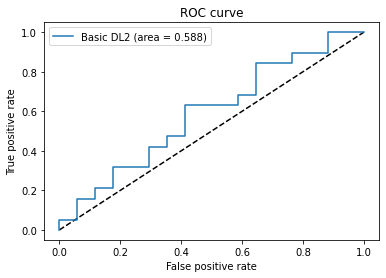

In [190]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Basic DL2 (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

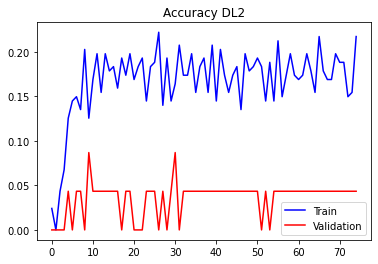

In [182]:
plt.figure()
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy DL2')
plt.show()

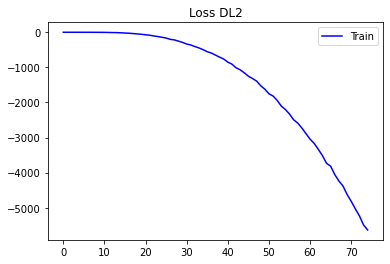

In [183]:
plt.figure()
plt.plot(range(len(history.history['loss'])), history.history['loss'], 'b', label='Train')
#plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Loss DL2')
plt.show()

LSTM

In [191]:
train_X_lstm = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X_lstm = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [192]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('LSTM_best_model3_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [193]:
from keras.layers import LSTM
from keras.layers.core import Dropout
model = Sequential()
model.add(LSTM(128, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2]), return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_X_lstm, train_Y, epochs=200, batch_size=2, verbose=1, validation_split=0.1,callbacks = [mc])

Epoch 1/200
 84/104 [=======================>......] - ETA: 0s - loss: 0.6127 - accuracy: 0.0893
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to LSTM_best_model3_ML_akshay_project.h5
104/104 [==============================] - 1s 7ms/step - loss: 0.6011 - accuracy: 0.0725 - val_loss: 0.2623 - val_accuracy: 0.0000e+00
Epoch 2/200
103/104 [============================>.] - ETA: 0s - loss: 0.5013 - accuracy: 0.0000e+00
Epoch 00002: val_accuracy did not improve from 0.00000
104/104 [==============================] - 1s 5ms/step - loss: 0.4931 - accuracy: 0.0000e+00 - val_loss: 0.1278 - val_accuracy: 0.0000e+00
Epoch 3/200
 95/104 [==========================>...] - ETA: 0s - loss: 0.4090 - accuracy: 0.0000e+00
Epoch 00003: val_accuracy did not improve from 0.00000
104/104 [==============================] - 1s 7ms/step - loss: 0.4681 - accuracy: 0.0000e+00 - val_loss: 0.1117 - val_accuracy: 0.0000e+00
Epoch 4/200
102/104 [============================>.] - ETA: 0s - lo

Epoch 29/200
 94/104 [==========================>...] - ETA: 0s - loss: -0.8968 - accuracy: 0.1383
Epoch 00029: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -0.8188 - accuracy: 0.1449 - val_loss: 0.8424 - val_accuracy: 0.0435
Epoch 30/200
103/104 [============================>.] - ETA: 0s - loss: -0.8422 - accuracy: 0.1893 
Epoch 00030: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -0.7953 - accuracy: 0.1884 - val_loss: 0.5044 - val_accuracy: 0.0435
Epoch 31/200
 86/104 [=======================>......] - ETA: 0s - loss: -0.8799 - accuracy: 0.1977
Epoch 00031: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -0.8344 - accuracy: 0.1739 - val_loss: 0.5853 - val_accuracy: 0.0435
Epoch 32/200
 84/104 [=======================>......] - ETA: 0s - loss: -0.8330 - accuracy: 0.1964
Epoch 00032: val_accuracy did not improve 

Epoch 58/200
 97/104 [==========================>...] - ETA: 0s - loss: -2.8957 - accuracy: 0.1649
Epoch 00058: val_accuracy did not improve from 0.04348
104/104 [==============================] - 1s 5ms/step - loss: -2.7174 - accuracy: 0.1643 - val_loss: 0.1247 - val_accuracy: 0.0435
Epoch 59/200
 98/104 [===========================>..] - ETA: 0s - loss: -2.3328 - accuracy: 0.1633
Epoch 00059: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -2.6727 - accuracy: 0.1546 - val_loss: 0.6612 - val_accuracy: 0.0435
Epoch 60/200
 99/104 [===========================>..] - ETA: 0s - loss: -2.2937 - accuracy: 0.2020
Epoch 00060: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -2.8549 - accuracy: 0.2077 - val_loss: 0.3306 - val_accuracy: 0.0435
Epoch 61/200
 95/104 [==========================>...] - ETA: 0s - loss: -3.5092 - accuracy: 0.1421
Epoch 00061: val_accuracy did not improve f

Epoch 87/200
 90/104 [========================>.....] - ETA: 0s - loss: -6.1096 - accuracy: 0.1889
Epoch 00087: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -4.7636 - accuracy: 0.1932 - val_loss: 0.3294 - val_accuracy: 0.0435
Epoch 88/200
 86/104 [=======================>......] - ETA: 0s - loss: -6.7998 - accuracy: 0.1860 
Epoch 00088: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -5.3074 - accuracy: 0.1884 - val_loss: 0.4484 - val_accuracy: 0.0435
Epoch 89/200
 84/104 [=======================>......] - ETA: 0s - loss: -4.8174 - accuracy: 0.2024
Epoch 00089: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -5.2705 - accuracy: 0.1836 - val_loss: 0.2872 - val_accuracy: 0.0435
Epoch 90/200
 84/104 [=======================>......] - ETA: 0s - loss: -5.0287 - accuracy: 0.1845
Epoch 00090: val_accuracy did not improve 

Epoch 116/200
 91/104 [=========================>....] - ETA: 0s - loss: -9.5080 - accuracy: 0.1593 
Epoch 00116: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -8.2655 - accuracy: 0.1691 - val_loss: -0.8255 - val_accuracy: 0.0435
Epoch 117/200
 95/104 [==========================>...] - ETA: 0s - loss: -8.0518 - accuracy: 0.2000
Epoch 00117: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -7.9695 - accuracy: 0.1884 - val_loss: -0.9056 - val_accuracy: 0.0435
Epoch 118/200
100/104 [===========================>..] - ETA: 0s - loss: -7.4282 - accuracy: 0.1700
Epoch 00118: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -8.1539 - accuracy: 0.1739 - val_loss: -0.2504 - val_accuracy: 0.0435
Epoch 119/200
 97/104 [==========================>...] - ETA: 0s - loss: -7.7440 - accuracy: 0.2010
Epoch 00119: val_accuracy did not i

104/104 [==============================] - ETA: 0s - loss: -11.4804 - accuracy: 0.1932
Epoch 00144: val_accuracy did not improve from 0.04348
104/104 [==============================] - 1s 7ms/step - loss: -11.4804 - accuracy: 0.1932 - val_loss: -3.4252 - val_accuracy: 0.0435
Epoch 145/200
100/104 [===========================>..] - ETA: 0s - loss: -12.1101 - accuracy: 0.1900
Epoch 00145: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -11.9519 - accuracy: 0.1884 - val_loss: -3.2818 - val_accuracy: 0.0435
Epoch 146/200
103/104 [============================>.] - ETA: 0s - loss: -12.1751 - accuracy: 0.1796
Epoch 00146: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 4ms/step - loss: -12.1163 - accuracy: 0.1836 - val_loss: -2.9783 - val_accuracy: 0.0435
Epoch 147/200
 99/104 [===========================>..] - ETA: 0s - loss: -9.8576 - accuracy: 0.2222 
Epoch 00147: val_accuracy did not improve f

104/104 [==============================] - ETA: 0s - loss: -16.4383 - accuracy: 0.2222
Epoch 00172: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -16.4383 - accuracy: 0.2222 - val_loss: -6.2010 - val_accuracy: 0.0435
Epoch 173/200
 84/104 [=======================>......] - ETA: 0s - loss: -14.4860 - accuracy: 0.1726
Epoch 00173: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -17.0499 - accuracy: 0.1981 - val_loss: -5.9164 - val_accuracy: 0.0435
Epoch 174/200
102/104 [============================>.] - ETA: 0s - loss: -16.5344 - accuracy: 0.2059
Epoch 00174: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -17.0278 - accuracy: 0.2126 - val_loss: -6.7433 - val_accuracy: 0.0435
Epoch 175/200
102/104 [============================>.] - ETA: 0s - loss: -15.7636 - accuracy: 0.2010
Epoch 00175: val_accuracy did not improve f

104/104 [==============================] - ETA: 0s - loss: -22.5028 - accuracy: 0.2174
Epoch 00200: val_accuracy did not improve from 0.04348
104/104 [==============================] - 0s 3ms/step - loss: -22.5028 - accuracy: 0.2174 - val_loss: -9.8176 - val_accuracy: 0.0435


In [194]:
from tensorflow.keras.models import load_model

LSTM_best_model3 = load_model('LSTM_best_model3_ML_akshay_project.h5')

In [195]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = LSTM_best_model3.predict(test_X_lstm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

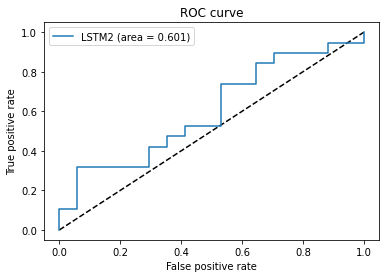

In [196]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='LSTM2 (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

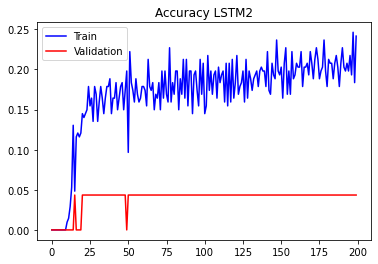

In [179]:
plt.figure()
plt.plot(range(len(history1.history['accuracy'])), history1.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history1.history['val_accuracy'])), history1.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy LSTM2')
plt.show()

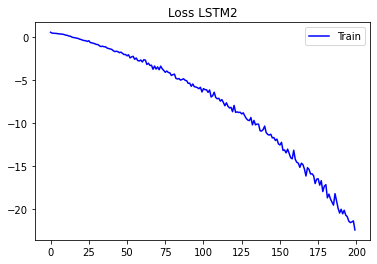

In [180]:
plt.figure()
plt.plot(range(len(history1.history['loss'])), history1.history['loss'], 'b', label='Train')
plt.legend()

plt.title('Loss LSTM2')
plt.show()

In [197]:
train_X_conv = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X_conv = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [198]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('Conv_best_model2_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [199]:
from keras.layers import Conv1D
model =Sequential()
model.add(Conv1D(256, 1,activation='relu', input_shape=(train_X_conv.shape[1], train_X_conv.shape[2])))
model.add(Conv1D(512, 1, activation='relu')) 

model.summary()
model.add(Dense(1,activation='sigmoid'))
          
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
history2 = model.fit(train_X_conv, train_Y, epochs=50, batch_size=1, validation_split=0.1,verbose=1,callbacks =[mc])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 1, 256)            7680      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1, 512)            131584    
Total params: 139,264
Trainable params: 139,264
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
202/207 [============================>.] - ETA: 0s - loss: 0.5473 - accuracy: 0.0446 - mse: 1.0098
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to Conv_best_model2_ML_akshay_project.h5
207/207 [==============================] - 1s 3ms/step - loss: 0.5475 - accuracy: 0.0435 - mse: 1.0088 - val_loss: 0.0246 - val_accuracy: 0.0000e+00 - val_mse: 1.0237
Epoch 2/50
199/207 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.0251 - mse: 0.9667
Epoch 00002

Epoch 23/50
199/207 [===========================>..] - ETA: 0s - loss: -5.5614 - accuracy: 0.5126 - mse: 0.4898
Epoch 00023: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 2ms/step - loss: -5.3231 - accuracy: 0.5024 - mse: 0.4942 - val_loss: 1.0079 - val_accuracy: 0.0870 - val_mse: 1.2323
Epoch 24/50
199/207 [===========================>..] - ETA: 0s - loss: -5.3657 - accuracy: 0.5025 - mse: 0.5051
Epoch 00024: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 3ms/step - loss: -5.3079 - accuracy: 0.5072 - mse: 0.5040 - val_loss: 2.2123 - val_accuracy: 0.0870 - val_mse: 1.3229
Epoch 25/50
192/207 [==========================>...] - ETA: 0s - loss: -5.4497 - accuracy: 0.4948 - mse: 0.4988
Epoch 00025: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 3ms/step - loss: -5.4368 - accuracy: 0.5024 - mse: 0.4928 - val_loss: 2.3030 - val_accuracy: 0.0870 - val_mse: 1.3439
Epoch 2

Epoch 48/50
202/207 [============================>.] - ETA: 0s - loss: -6.4143 - accuracy: 0.5644 - mse: 0.4356
Epoch 00048: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 4ms/step - loss: -6.1849 - accuracy: 0.5700 - mse: 0.4300 - val_loss: 4.6235 - val_accuracy: 0.1304 - val_mse: 1.5252
Epoch 49/50
189/207 [==========================>...] - ETA: 0s - loss: -5.7945 - accuracy: 0.5926 - mse: 0.4074
Epoch 00049: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 5ms/step - loss: -6.1849 - accuracy: 0.5700 - mse: 0.4300 - val_loss: 4.6731 - val_accuracy: 0.1304 - val_mse: 1.5262
Epoch 50/50
188/207 [==========================>...] - ETA: 0s - loss: -5.9074 - accuracy: 0.5851 - mse: 0.4149
Epoch 00050: val_accuracy did not improve from 0.17391
207/207 [==============================] - 1s 4ms/step - loss: -6.1849 - accuracy: 0.5700 - mse: 0.4300 - val_loss: 4.7186 - val_accuracy: 0.1304 - val_mse: 1.5272


In [200]:
Conv_best_model2 = load_model('Conv_best_model2_ML_akshay_project.h5')

In [201]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = Conv_best_model2.predict(test_X_conv).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

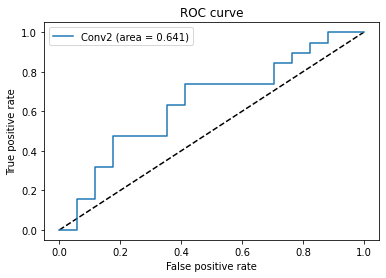

In [202]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Conv2 (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

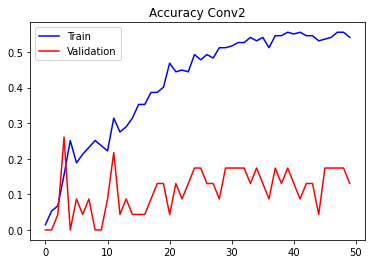

In [176]:
plt.figure()
plt.plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy Conv2')
plt.show()

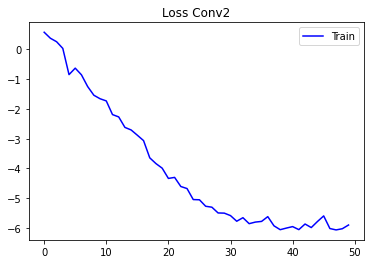

In [177]:
plt.figure()
plt.plot(range(len(history2.history['loss'])), history2.history['loss'], 'b', label='Train')
plt.legend()

plt.title('Loss Conv2')
plt.show()

In [90]:
model2_acc = history2.history['accuracy'][-1] * 100
print(model2_acc)

55.978262424468994
